Below we imported the packages we believed we would need for our analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# I. Exploration

Here, we loaded in our data and looked at the shape of the dataframe.

In [ ]:
fastfooddata = pd.read_csv('FastFoodData.csv')
fastfooddata.shape

(1444, 13)

Next, we confirmed that our data had no missing values.

In [ ]:
pd.options.display.max_rows = None
print(fastfooddata.isnull().sum())

Restaurant             0
Item                   0
Calories               0
Fat (g)                0
Saturated Fat (g)      0
Trans Fat (g)          0
Cholesterol (mg)       0
Sodium (mg)            0
Carbs (g)              0
Fiber (g)              0
Sugars (g)             0
Protein (g)            0
Weight Watcher Pnts    0
dtype: int64


Below, we visualized how many data points we had for each restaurant. We also created a few exploratory visualizations to look at the relationships of a few variables with our dependent variable.

Restaurant
Burger King        77
Dunkin Donuts     737
Little Caesars     77
McDonalds         325
Subway            185
Wendys             43
Name: Restaurant, dtype: int64

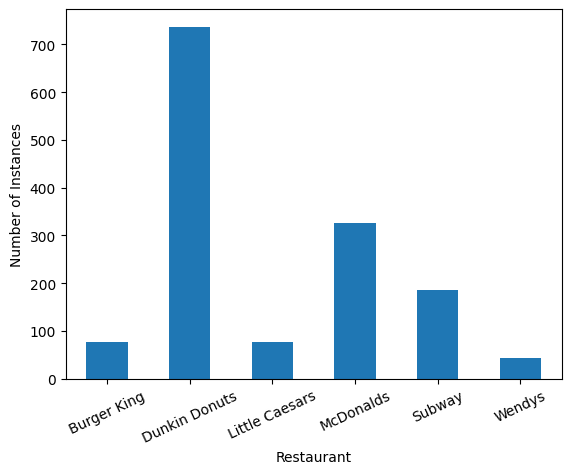

In [ ]:
numrest = fastfooddata.groupby('Restaurant')['Restaurant'].count()
numrest.plot(kind='bar')
plt.xticks(rotation=25)
plt.ylabel("Number of Instances")

numrest

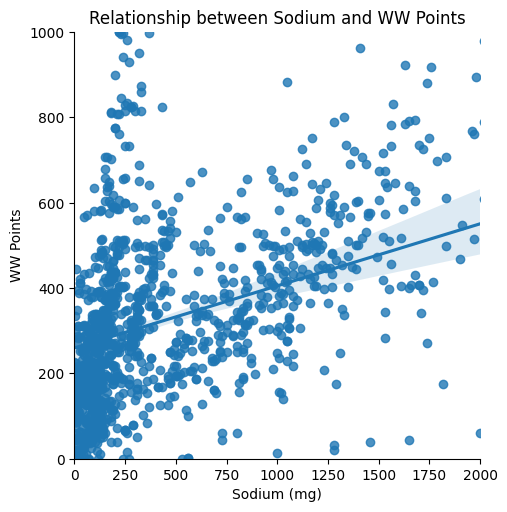

In [ ]:
sns.lmplot(data = fastfooddata,
           x= 'Sodium (mg)',
           y='Weight Watcher Pnts')

plt.title("Relationship between Sodium and WW Points")
plt.xlabel("Sodium (mg)")
plt.ylabel("WW Points")

plt.axis([0,2000,0,1000])
plt.show()

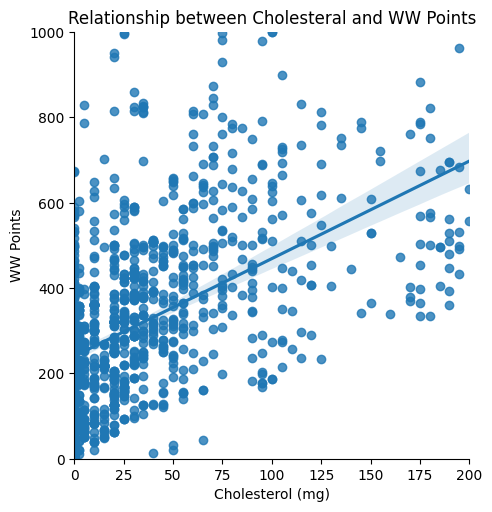

In [ ]:
sns.lmplot(data = fastfooddata,
           x='Cholesterol (mg)',
           y='Weight Watcher Pnts')

plt.title("Relationship between Cholesteral and WW Points")
plt.xlabel("Cholesterol (mg)")
plt.ylabel("WW Points")

plt.axis([0,200,0,1000])
plt.show()

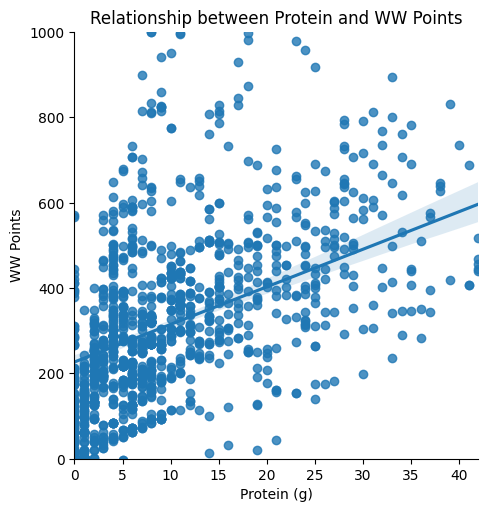

In [ ]:
sns.lmplot(data = fastfooddata,
           x= 'Protein (g)',
           y='Weight Watcher Pnts')

plt.title("Relationship between Protein and WW Points")
plt.xlabel("Protein (g)")
plt.ylabel("WW Points")

plt.axis([0,42,0,1000])
plt.show()

Lastly, we decided to create a histogram to visualize the distribution of our dependent variable.

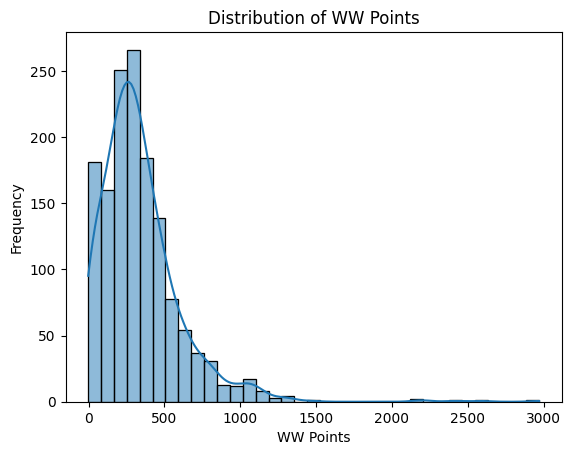

In [ ]:
sns.histplot(fastfooddata['Weight Watcher Pnts'],
             bins=35,
             kde=True)

plt.title("Distribution of WW Points")
plt.xlabel("WW Points")
plt.ylabel("Frequency")

plt.show()

# II. Regression Analysis

Our first step in assessing the significance of our independent variables was to see how heavily our variables related to our dependent variable through a correlation matrix. We decided to create a heatmap to better visualize the results from the correlation matrix as well.

In [ ]:
correlation_matrix = fastfooddata.corr()

pnts_corr = correlation_matrix["Weight Watcher Pnts"].sort_values(ascending=False)
print(pnts_corr)

Weight Watcher Pnts    1.000000
Calories               0.813723
Saturated Fat (g)      0.773070
Carbs (g)              0.752324
Fat (g)                0.740348
Protein (g)            0.631642
Trans Fat (g)          0.612603
Cholesterol (mg)       0.600390
Sodium (mg)            0.531111
Fiber (g)              0.492701
Sugars (g)             0.431951
Name: Weight Watcher Pnts, dtype: float64


<ipython-input-64-f79334bf222f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = fastfooddata.corr()


<Axes: >

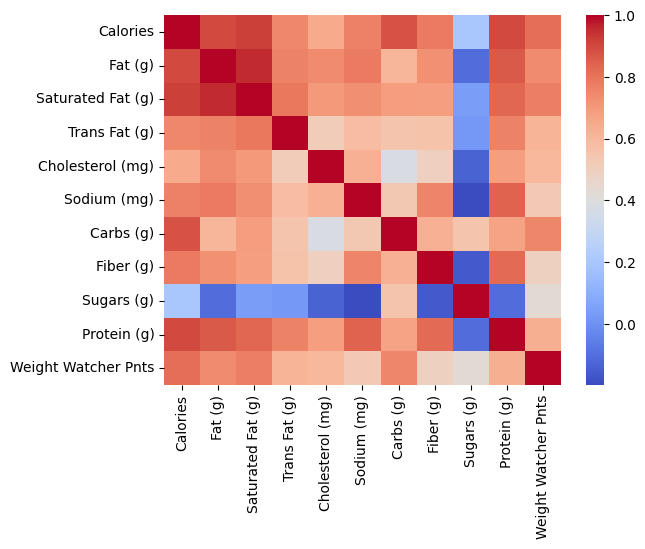

In [ ]:
sns.heatmap(correlation_matrix,
            annot=False,
            cmap='coolwarm',
            xticklabels = True,
            yticklabels = True)

After evaluating the correlation matrix, we decided to begin creating our linear model with the nutrition facts given in our data as our independent variables and the Weight Watchers points as our dependent variable. We also created a dataframe to look at the coefficiencts of our variables.

In [ ]:
features = ['Calories', 'Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)',
            'Cholesterol (mg)', 'Sodium (mg)', 'Carbs (g)', 'Fiber (g)', 'Sugars (g)',
            'Protein (g)']

X = fastfooddata[features]


y = fastfooddata['Weight Watcher Pnts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

pd.DataFrame(zip(X.columns, model.coef_))

,0,1
0,Calories,0.958981
1,Fat (g),1.556980
2,Saturated Fat (g),-2.527600
3,Trans Fat (g),26.503021
4,Cholesterol (mg),0.706696
5,Sodium (mg),0.008006
6,Carbs (g),-4.500673
7,Fiber (g),9.737843
8,Sugars (g),5.370614
9,Protein (g),-4.687061


Next, we used our model to make predictions and output the Root Mean Squared Error, R^2 and adjusted R^2 for our model.

In [ ]:
y_pred = model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error: {rmse}")

r2 = r2 = model.score(X_train,y_train)
print(f"R^2 Score: {r2}")

n = X_train.shape[0]
k = len(features)

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f"Adjusted R^2 Score: {adjusted_r2}")

Root Mean Squared Error: 107.00353687772977
R^2 Score: 0.8318728874194417
Adjusted R^2 Score: 0.8304032448269543


Next we used OLS to evalaute using p values


In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Weight Watcher Pnts   R-squared:                       0.835
Model:                             OLS   Adj. R-squared:                  0.834
Method:                  Least Squares   F-statistic:                     723.4
Date:                 Sat, 30 Sep 2023   Prob (F-statistic):               0.00
Time:                         19:53:01   Log-Likelihood:                -8843.0
No. Observations:                 1444   AIC:                         1.771e+04
Df Residuals:                     1433   BIC:                         1.777e+04
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                54.7464

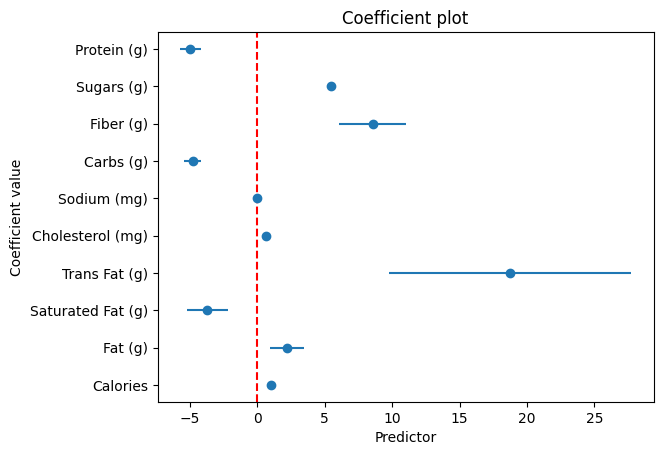

In [ ]:
coefs = model.params[1:]
errors = model.bse[1:]

plt.errorbar(coefs.values, coefs.index, xerr=errors, fmt='o')
plt.axvline(0, color='red', linestyle='--')

plt.title('Coefficient plot')
plt.ylabel('Coefficient value')
plt.xlabel('Predictor')
plt.show()

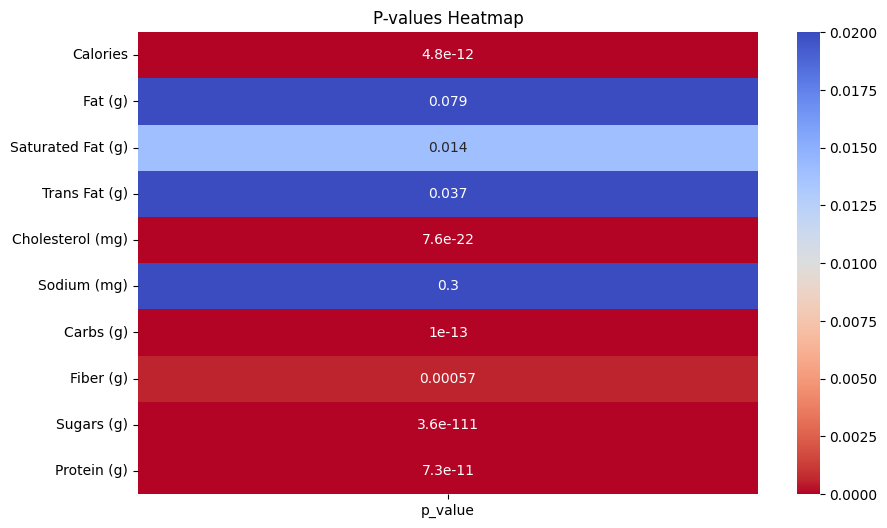

In [ ]:
pvalues = model.pvalues[1:].to_frame()
pvalues.columns = ['p_value']

plt.figure(figsize=(10, 6))
sns.heatmap(pvalues, annot=True, cmap='coolwarm_r', vmin=0, vmax=0.02)

plt.title('P-values Heatmap')
plt.show()

# III. Clustering

First we need to extract only the numeric features from the dataset, leaving out the restaurant and items.

After we need to normalize the data.

In [ ]:
df_cluster = fastfooddata[features]

scaler = StandardScaler()

data_normalized = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

Next, we need to figure out how many clusters to generate. We will test out different K values to generate the optimal within-clusters sum-of-squares.

In [ ]:
wcss = []
max_clusters = 10

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)

    kmeans.fit(data_normalized)

    wcss.append(kmeans.inertia_)

To pick an appropriate K-value, we need to plot the results.

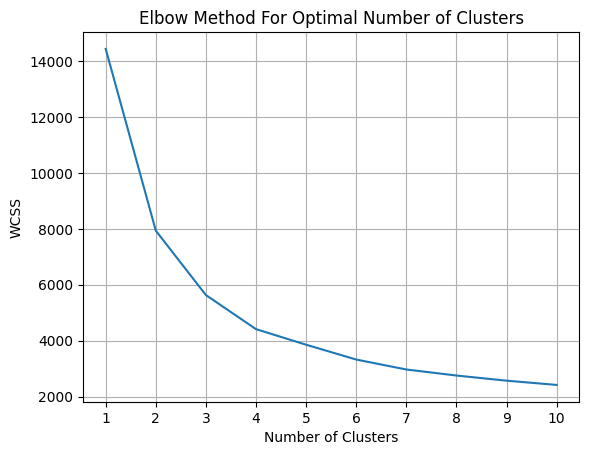

In [ ]:
plt.plot(range(1, max_clusters + 1), wcss)

plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)

plt.show()

Here we can see that kinks in the curve at 2, 3, and 4. We will choose 4 moving forward.

Application of k-means with 4 clusters:

In [ ]:
k = 4

kmeans = KMeans(n_clusters=k,
                n_init = 10,
                random_state=42)


Next, we need to create a cluster column to match each item with its cluster group.

In [ ]:
fastfooddata['cluster'] = kmeans.fit_predict(data_normalized)

Here we can see that the cluster column has been added to the data.

In [ ]:
fastfooddata.head()

,Restaurant,Item,Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watcher Pnts,cluster
0,Burger King,Whopper® Sandwich,660.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0,0
1,Burger King,Whopper® Sandwich with Cheese,740.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0,0
2,Burger King,Bacon & Cheese Whopper® Sandwich,790.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0,0
3,Burger King,Double Whopper® Sandwich,900.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0,0
4,Burger King,Double Whopper® Sandwich with Cheese,980.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0,0


Now we can see the mean values for each column for each of the 4 clusters.

In [ ]:
cluster_stats = fastfooddata.groupby('cluster').mean()
cluster_stats

<ipython-input-78-3527adbc6dfc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = fastfooddata.groupby('cluster').mean()


,Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watcher Pnts
cluster,,,,,,,,,,,
0,573.267717,31.897638,11.330709,0.505906,138.188976,1463.385827,43.188976,2.952756,6.653543,29.031496,543.330709
1,2513.000000,108.233333,45.800000,2.833333,239.833333,5265.000000,273.866667,14.533333,19.666667,121.633333,1114.833333
2,201.638943,6.084638,2.660470,0.009785,14.990215,233.478474,30.779843,0.653620,23.300391,6.191781,220.159491
3,594.927536,14.760870,9.282609,0.355072,41.014493,254.637681,106.652174,0.804348,95.956522,9.572464,690.594203


We can see that cluster 2 performs the best with weight watchers points.

We will now see which food items are in each cluster.

Items within cluster 0 (2nd best performing):

In [ ]:
fastfooddata[['Restaurant', 'Item']].loc[fastfooddata['cluster'] == 0]

,Restaurant,Item
0,Burger King,Whopper® Sandwich
1,Burger King,Whopper® Sandwich with Cheese
2,Burger King,Bacon & Cheese Whopper® Sandwich
3,Burger King,Double Whopper® Sandwich
4,Burger King,Double Whopper® Sandwich with Cheese
5,Burger King,Triple Whopper® Sandwich
6,Burger King,Triple Whopper® Sandwich with Cheese
8,Burger King,Bacon King Sandwich
9,Burger King,Cheddar Bacon King Sandwich
10,Burger King,Single Quarter Pound King Sandwich


Items within cluster 1 (Worst performing):

In [ ]:
fastfooddata[['Restaurant', 'Item']].loc[fastfooddata['cluster'] == 1]

,Restaurant,Item
814,Little Caesars,Large Extra Most Bestest - Beef
815,Little Caesars,Large Extra Most Bestest – Cheese
816,Little Caesars,Large Extra Most Bestest – Pepperoni
817,Little Caesars,Large Extra Most Bestest – Sausage
818,Little Caesars,Large Extra Most Bestest – Stuffed Crust Peppe...
819,Little Caesars,"Deep! Deep! Dish Speciality Pizza, 3 Meat 30"
820,Little Caesars,"Deep! Deep! Dish Speciality Pizza,Hula Hawaili..."
821,Little Caesars,"Deep! Deep! Dish Speciality Pizza,Hula Hawaili..."
822,Little Caesars,"Deep! Deep! Dish Speciality Pizza,Ultimate Sup..."
823,Little Caesars,"Deep! Deep! Dish Speciality Pizza, Veggie"


Items within Cluster 2 (Best performing):

In [ ]:
fastfooddata[['Restaurant', 'Item']].loc[fastfooddata['cluster'] == 2]

,Restaurant,Item
7,Burger King,Whopper JR.® Sandwich
15,Burger King,Hamburger
16,Burger King,Cheeseburger
20,Burger King,Bacon Cheeseburger
27,Burger King,Crispy Chicken Jr.
28,Burger King,Spicy Crispy Chicken Jr.
29,Burger King,Chicken Nuggets- 4pc
30,Burger King,Chicken Nuggets- 6pc
31,Burger King,Chicken Nuggets- 10pc
33,Burger King,Spicy Chicken Nuggets- 4pc


Items within Custer 3 (2nd worst performing):

In [ ]:
fastfooddata[['Restaurant', 'Item']].loc[fastfooddata['cluster'] == 3]

,Restaurant,Item
88,Dunkin Donuts,"Blue Raspberry Coolatta, Large"
89,Dunkin Donuts,"Blue Raspberry Coolatta, Medium"
91,Dunkin Donuts,"Vanilla Bean Coolatta, Large"
92,Dunkin Donuts,"Vanilla Bean Coolatta, Small"
93,Dunkin Donuts,"Pineapple Coolatta, Large"
94,Dunkin Donuts,"Pineapple Coolatta, Medium"
165,Dunkin Donuts,"Caramel Swirl Frozen Chocolate, Large"
166,Dunkin Donuts,"Caramel Swirl Frozen Chocolate, Medium"
167,Dunkin Donuts,"Caramel Swirl Frozen Chocolate, Small"
168,Dunkin Donuts,"French Vanilla Swirl Frozen Chocolate, Large"


# Visualizing Cluster Centers

We will now take a look at a heat map of the cluster centers to see if we can find any more valuable information.

First we need to extract the centers from the clustering results.

In [ ]:
cluster_centers = kmeans.cluster_centers_

Next we will join the cluster centers with the columns in our feature data.

In [ ]:
cluster_centers_ori = pd.DataFrame(cluster_centers, columns=df_cluster.columns)

Graphing the results:

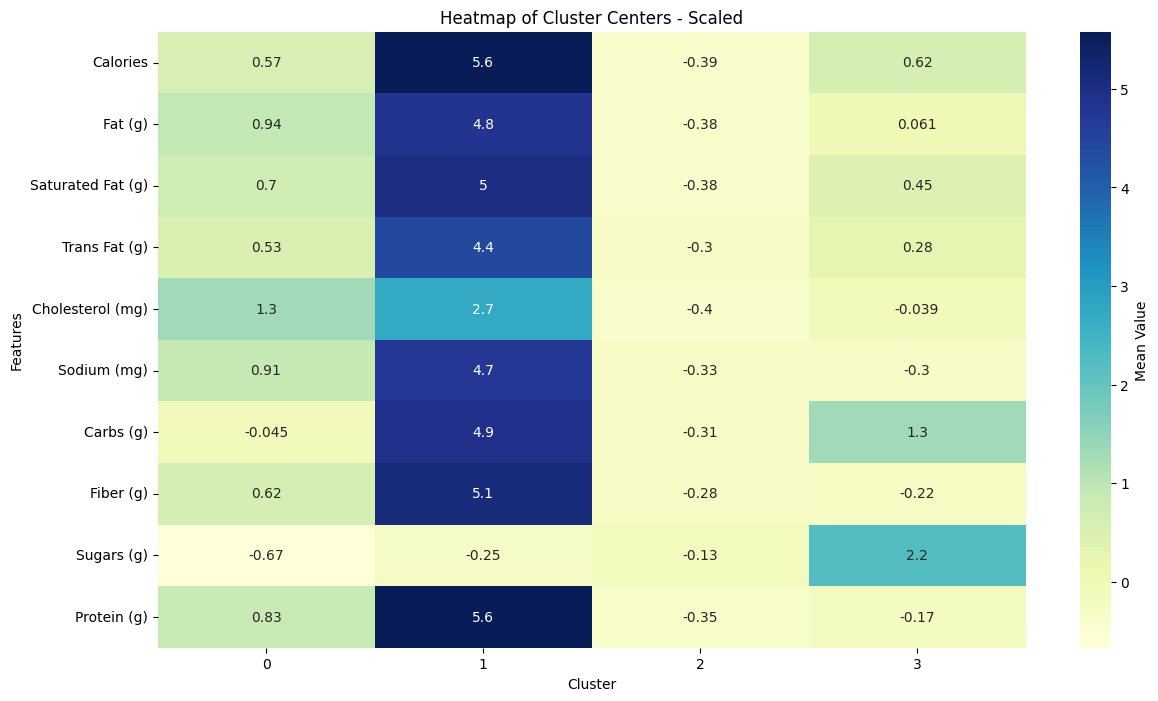

In [ ]:
plt.figure(figsize=(14, 8))

sns.heatmap(cluster_centers_ori.T,
            cmap='YlGnBu',
            annot=True,
            cbar_kws={'label': 'Mean Value'})

plt.title('Heatmap of Cluster Centers - Scaled')
plt.ylabel('Features')
plt.xlabel('Cluster')

plt.show()

We will now use the inverse transform method to restore the original scale of the data that we normalized.

In [ ]:
cluster_centers_data = pd.DataFrame(scaler.inverse_transform(cluster_centers), columns=df_cluster.columns)

Graphing the results:

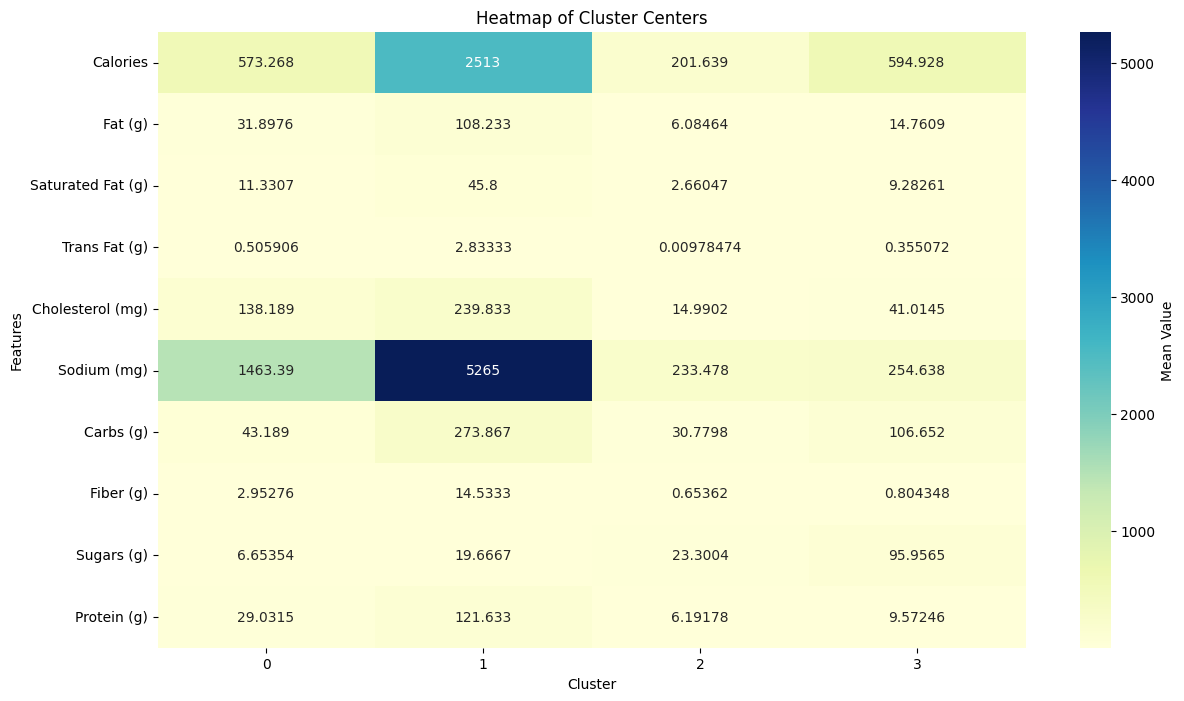

In [ ]:
plt.figure(figsize=(14, 8))

sns.heatmap(cluster_centers_data.T,
            cmap='YlGnBu',
            fmt='g',
            annot=True,
            cbar_kws={'label': 'Mean Value'})

plt.title('Heatmap of Cluster Centers')
plt.ylabel('Features')
plt.xlabel('Cluster')

plt.show()